<a href="https://colab.research.google.com/github/shairatabassum/MachineLearning_python/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principle Component Analysis (PCA)**

**Goal:** PCA finds a new set of dimensions such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. 

Find a transformation such that:
* The transformed features are linearly independent
* Dimensionality can be reduced by taking only the dimensions with the highest importance
* Those newly found dimensions should minimize the projection error
* The projected points should have maximum spread, i.e. maximum variance

**Variance:** How much variation or spread the data has.

$ var (X) = \frac{1}{n} $$\sum$$ (X_i - \bar{X})^2 $

**Covariance Matrix:** Indicates the level to which two variables vary together. 

$ cov (x,y) = \frac{1}{n} $$\sum$$ (X_i - \bar{X})(Y_i - \bar{Y})^T $

**Eigenvector, Eigenvalues:** The eigenvectors point in the direction of the maximum variance, and the corresponding eigenvalues indicates the importance of its corresponding eigen vector. 

$ A \vec{v} = \lambda \vec{v} $

**Approach:**
* Substract the mean from X
* Calculate cov(X,X)
* Calculate eigenvectors and eigenvalues of covariance matrix
* Sort the eigenvectors according to their eigenvalues in decreasing order
* Choose first k eigenvectors and that will be the new k dimensions
* Transform the original n dimensional data points into k dimensions (= Projections with dot product)

### **Import Dataset**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.decomposition import PCA
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [2]:
# load dataset
data = datasets.load_iris()
X = data.data
y = data.target

### **PCA from scratch**

In [3]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [4]:
# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


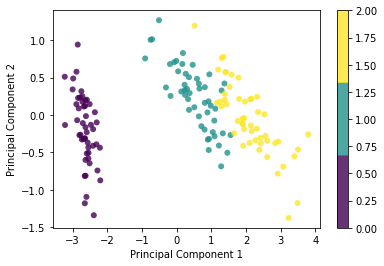

In [5]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

### **PCA using scikit-learn**

In [11]:
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [13]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

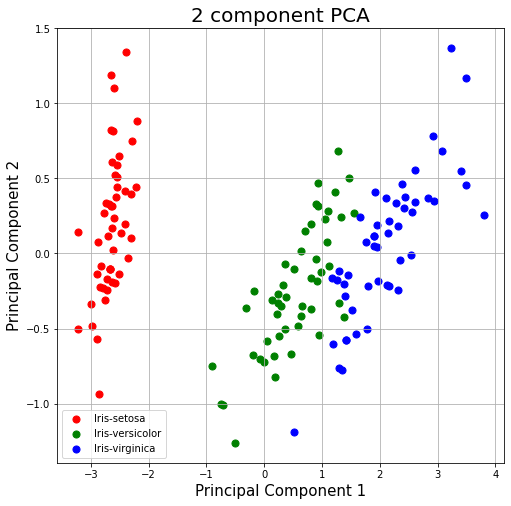

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()